# Convolutional Neural Nets

This type of neural nets are predominantly (and heavily) used in image processing.
https://www.youtube.com/watch?v=BcEapJEKz3M

## Useful terms:

1. Convolution
2. Max pooling
2. Softmax
3. Cross Entropy

## Further Readings:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

mnist = input_data.read_data_sets('./data')

Using TensorFlow backend.


Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)
num_pixels = x.shape[1]
width = 28
height = 28

In [3]:
x.shape

(20, 784)

In [4]:
28*28

784

In [5]:
y.shape

(20,)

In [6]:
y

array([7, 3, 9, 2, 2, 9, 9, 1, 2, 0, 0, 1, 7, 0, 4, 6, 9, 9, 8, 1], dtype=uint8)

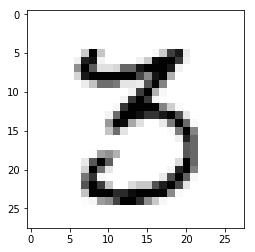

In [7]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

## Basic logistic multiclass classification:

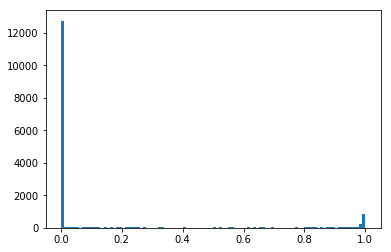

In [8]:
plt.hist(x.ravel(),100)
plt.show()

In [9]:
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(1000)

In [10]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = logistic.predict(x_test)
y_pred[:10]

array([0, 8, 9, 1, 4, 5, 7, 8, 5, 3], dtype=uint8)

Predicting the probabilities for the first 3 images:

In [12]:
logistic.predict_proba(x_test[:3])

array([[  9.73557557e-01,   2.89140027e-09,   1.65240975e-02,
          3.39018976e-05,   5.14599719e-08,   1.98299073e-04,
          8.20972959e-03,   4.27165895e-04,   7.08869036e-04,
          3.40325402e-04],
       [  2.59358888e-04,   6.00603443e-11,   7.65702745e-09,
          6.66169005e-07,   1.56035062e-08,   9.51149443e-06,
          6.43982770e-07,   5.34298811e-08,   9.99717877e-01,
          1.18654410e-05],
       [  1.68419927e-05,   3.79390030e-02,   9.47577059e-02,
          3.71198350e-01,   7.23491211e-03,   3.82190952e-04,
          2.75959665e-03,   1.88232358e-07,   5.51936535e-03,
          4.80191845e-01]])

Accuracy of the predictions:

In [13]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.871

## Keras Multilayered Perceptron (Neural Net)

In [14]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

### Zero hidden layers

It is important to note that when we do classification problems we use the **Categorical Crossentropy Loss**. When its only two classes we can use Logistic Loss (Binary Crossentropy Loss). Finally for regression problems we use **Mean Squared Error**.

The Cross Entropy loss is defined as:
$$\mathcal{L} = -\frac{1}{N}\sum_i \mathcal{I}(y_i=1)\log(p_{i1})+\mathcal{I}(y_i=2)\log(1-p_{i2})+\cdots++\mathcal{I}(y_i=K)\log(1-p_{iK})$$
where $N$ is the number of training instances, $K$ is the number of classes and $p_{ik}$ is the probability that instance $i$ belongs to $k$.

Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [15]:
model = Sequential()
model.add(Dense(units=10, input_dim=num_pixels, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [16]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 7s 32ms/step - loss: 1.3418


In [17]:
print("mnist.train.num_examples : ", mnist.train.num_examples)
print("mnist.test  num_examples : ", len(y_test))

mnist.train.num_examples :  55000
mnist.test  num_examples :  1000


In [18]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

array([0, 8, 1, 1, 4, 5, 7, 8, 5, 3])

In [19]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.818

### 1 Hidden Layer

In [20]:
model = Sequential()
model.add(Dense(units=50, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [21]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 2s 9ms/step - loss: 0.8621


In [22]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

0.895

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*50+50

39250

## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

In [25]:
# Need to reshape the x values to a 28x28 image
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
28*28*32

25088

In [29]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 37s 175ms/step - loss: 0.4814


In [30]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.932

### Using the max pooling layer:

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
14*14*32

6272

In [34]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 35s 162ms/step - loss: 0.6149


In [35]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.922

## Multi Layer Convolutional Network:

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
__________

### Iteratively machine learning: scanning through entire training image set only once: epochs=1

In [38]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 78s 364ms/step - loss: 0.7184


In [39]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.956

### Iteratively machine learning: scanning through entire training image set for 10 times: epochs=10

In [40]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=10)

Epoch 1/10
214/214 [==============================] - 118s 551ms/step - loss: 0.1347
Epoch 2/10
214/214 [==============================] - 78s 363ms/step - loss: 0.0986
Epoch 3/10
214/214 [==============================] - 143s 668ms/step - loss: 0.0839
Epoch 4/10
214/214 [==============================] - 153s 715ms/step - loss: 0.0712
Epoch 5/10
214/214 [==============================] - 155s 722ms/step - loss: 0.0624
Epoch 6/10
214/214 [==============================] - 189s 881ms/step - loss: 0.0576
Epoch 7/10
214/214 [==============================] - 220s 1s/step - loss: 0.0551
Epoch 8/10
214/214 [==============================] - 221s 1s/step - loss: 0.0484
Epoch 9/10
214/214 [==============================] - 179s 837ms/step - loss: 0.0470
Epoch 10/10
214/214 [==============================] - 114s 532ms/step - loss: 0.0438


In [41]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.979

---